In [27]:
%matplotlib nbagg

import sys
sys.path.insert(0, '../')

from pharynx_analysis import experiment
from pharynx_analysis import pharynx_io
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from skimage import measure, transform
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd

In [2]:
strains = pharynx_io.load_strain_map("/Users/sean/code/wormAnalysis/python/tests/test_data/paired_ratio_images_0/2017_02_22-HD233_SAY47_strain_map.csv")

In [4]:
pe = experiment.PairExperiment(
    raw_image_path="/Users/sean/code/wormAnalysis/python/tests/test_data/paired_ratio_images_0/2017_02_22-HD233_SAY47.tif",
    imaging_scheme="TL/470_1/410_1/470_2/410_2",
    strain_map=strains
)

In [6]:
pe.raw_intensity_data

<xarray.DataArray (wavelength: 4, strain: 123, z: 500)>
array([[[259.817947, 260.556116, ..., 569.047906, 574.34425 ],
        [259.295351, 259.744299, ..., 434.999874, 399.093592],
        ...,
        [256.739086, 257.138443, ..., 530.510679, 530.255134],
        [250.763965, 251.438839, ..., 555.942377, 555.117908]],

       [[232.387709, 232.820535, ..., 520.348387, 527.244189],
        [239.413442, 240.241888, ..., 405.516031, 388.758251],
        ...,
        [237.306167, 236.970131, ..., 471.289712, 475.358166],
        [233.330295, 233.516696, ..., 499.727713, 499.996417]],

       [[260.28116 , 260.512773, ..., 599.446851, 605.676183],
        [263.553961, 263.914922, ..., 445.193608, 421.346445],
        ...,
        [259.423727, 260.613578, ..., 517.634607, 521.195596],
        [248.572134, 248.537961, ..., 560.115852, 557.34186 ]],

       [[238.264033, 238.938428, ..., 515.096026, 520.129234],
        [234.424051, 235.175256, ..., 395.709686, 375.521213],
        ...,
    

In [7]:
df = pe.raw_intensity_data.to_dataframe(name='df')
df = pd.DataFrame(df.to_records())
df

,wavelength,strain,z,x,y,df
0,410_1,HD233,0,40.000000,67.936048,259.817947
1,410_1,HD233,1,40.160321,67.895125,260.556116
2,410_1,HD233,2,40.320641,67.854466,261.278677
3,410_1,HD233,3,40.480962,67.814070,261.985780
4,410_1,HD233,4,40.641283,67.773936,262.677578
5,410_1,HD233,5,40.801603,67.734065,263.354220
6,410_1,HD233,6,40.961924,67.694454,264.015857
7,410_1,HD233,7,41.122244,67.655104,264.778153
8,410_1,HD233,8,41.282565,67.616013,265.510601
9,410_1,HD233,9,41.442886,67.577181,266.171008


In [ ]:
# sns.relplot(
#     x="x", y="df",
#     hue="strain", col="wavelength", 
#     kind="line", data=df
# )

array(['410_1', '470_1', '410_2', '470_2', 'c'], dtype='<U5')

<IPython.core.display.Javascript object>


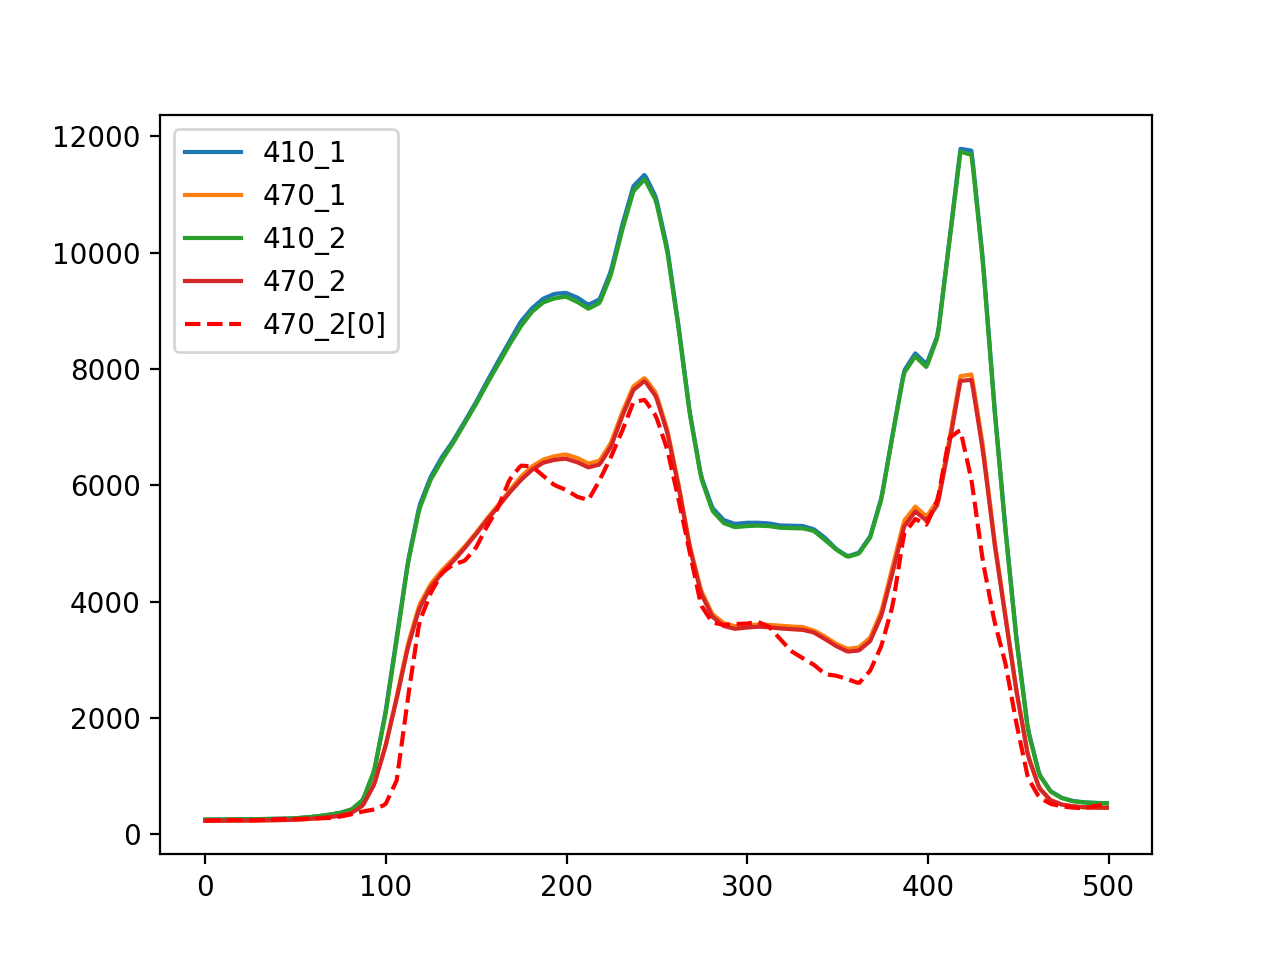

In [61]:
data = pe.raw_intensity_data.groupby('wavelength').mean(dim='strain').T
fig, ax = plt.subplots()
i=0
_=ax.plot(data)
_=ax.plot(pe.raw_intensity_data.sel(wavelength='470_2')[i], 'r--')
ax.legend(np.append(data.wavelength.data, f'470_2[{i}]'))

In [30]:
r1 = pe.raw_intensity_data.sel(wavelength='410_1') / pe.raw_intensity_data.sel(wavelength='410_2')
r2 = pe.raw_intensity_data.sel(wavelength='470_1') / pe.raw_intensity_data.sel(wavelength='470_2')

<IPython.core.display.Javascript object>


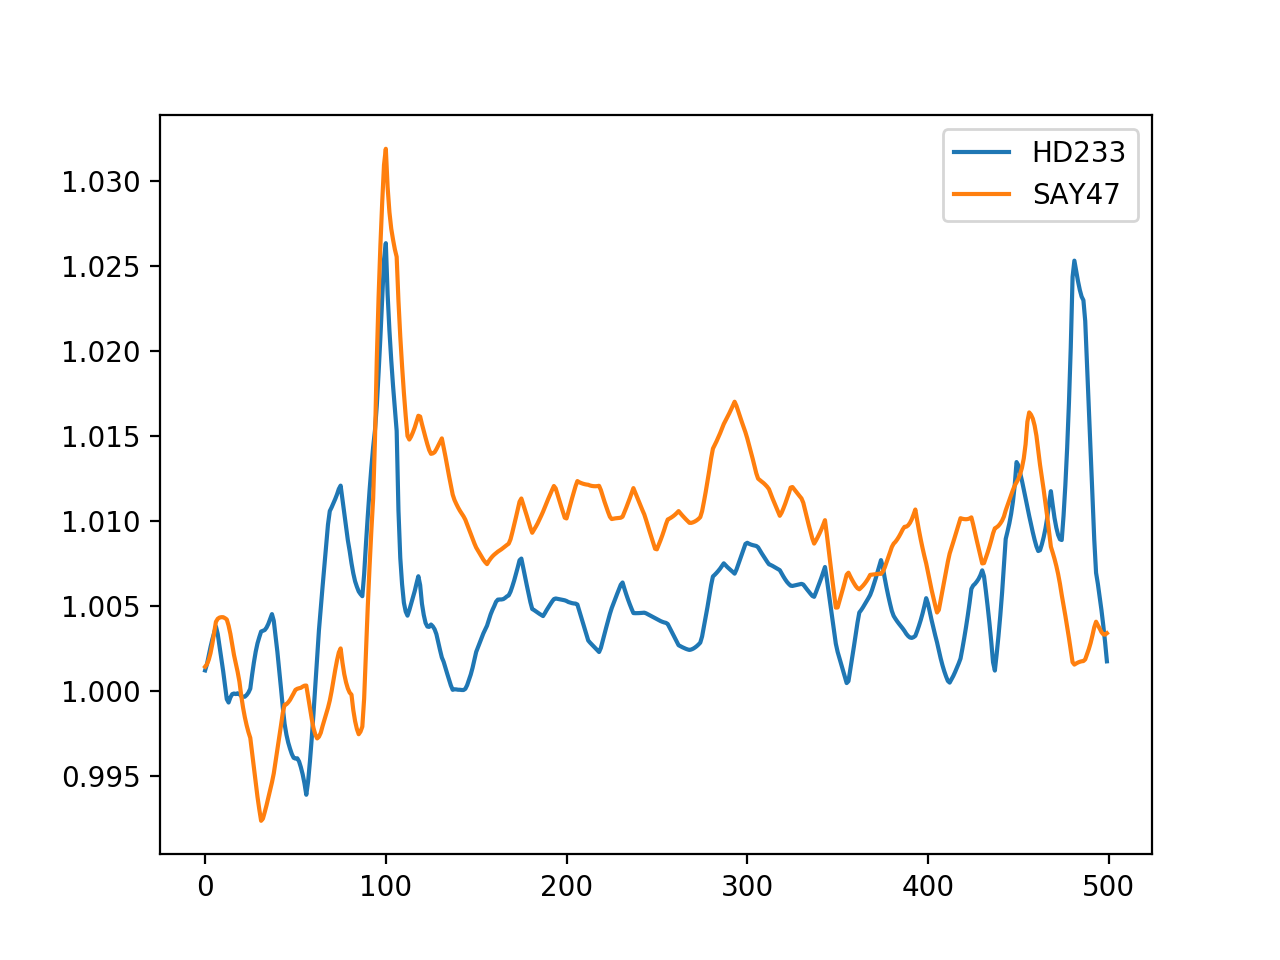

In [60]:
fig, ax = plt.subplots()
gb = r1.groupby('strain').mean(dim='strain').T
ax.plot(gb)
ax.legend(gb.strain.data)